# BFSI

# Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# Output File

In [2]:
output_file = "eda_analysis_report.txt"
def write_output(text, print_text=True):
    """Write text to both console and output file"""
    if print_text:
        print(text)
    with open(output_file, 'a', encoding='utf-8') as f:
        f.write(text + '\n')

In [3]:
# Clear the output file
with open(output_file, 'w', encoding='utf-8') as f:
    f.write("="*80 + '\n')
    f.write("COMPREHENSIVE EDA REPORT - TRANSACTIONS CLEAN DATASET\n")
    f.write(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write("="*80 + '\n\n')

# 1. LOAD DATA

In [4]:
write_output("1. DATA LOADING AND BASIC OVERVIEW")
df = pd.read_csv('/kaggle/input/cleaned-data/transactions_clean.csv')
write_output(f"Dataset loaded successfully!")
write_output(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
write_output(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

1. DATA LOADING AND BASIC OVERVIEW
Dataset loaded successfully!
Dataset Shape: 5000 rows × 17 columns
Memory Usage: 1.53 MB


# 2. COLUMN INFORMATION

In [5]:
write_output("2. COLUMN INFORMATION")
write_output("\nColumn Names and Data Types:")
for idx, (col, dtype) in enumerate(df.dtypes.items(), 1):
    write_output(f"  {idx:2d}. {col:30s} → {str(dtype)}")
write_output(f"\nTotal Columns: {len(df.columns)}")
write_output(f"  - Numeric Columns: {len(df.select_dtypes(include=[np.number]).columns)}")
write_output(f"  - Object Columns: {len(df.select_dtypes(include=['object']).columns)}")

2. COLUMN INFORMATION

Column Names and Data Types:
   1. transaction_id                 → object
   2. customer_id                    → object
   3. account_age_days               → int64
   4. transaction_amount             → float64
   5. timestamp                      → object
   6. is_fraud                       → int64
   7. hour                           → int64
   8. weekday                        → int64
   9. month                          → int64
  10. is_high_value                  → int64
  11. transaction_amount_log         → float64
  12. channel_Atm                    → float64
  13. channel_Mobile                 → float64
  14. channel_Pos                    → float64
  15. channel_Web                    → float64
  16. kyc_verified_No                → float64
  17. kyc_verified_Yes               → float64

Total Columns: 17
  - Numeric Columns: 14
  - Object Columns: 3


# 3. MISSING VALUES ANALYSIS

In [6]:
write_output("3. MISSING VALUES ANALYSIS")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
if missing_df['Missing Count'].sum() > 0:
    write_output("\nColumns with Missing Values:")
    for col in missing_df[missing_df['Missing Count'] > 0].index:
        write_output(f"  {col}: {missing_df.loc[col, 'Missing Count']} ({missing_df.loc[col, 'Percentage']:.2f}%)")
else:
    write_output("\n✅ No missing values found in the dataset!")

3. MISSING VALUES ANALYSIS

✅ No missing values found in the dataset!


# 4. DUPLICATE ANALYSIS

In [7]:
write_output("4. DUPLICATE RECORDS ANALYSIS")
duplicates = df.duplicated().sum()
write_output(f"\nTotal Duplicate Rows: {duplicates}")
if duplicates > 0:
    write_output(f"Percentage of Duplicates: {(duplicates/len(df))*100:.2f}%")
else:
    write_output("No duplicate records found!")

4. DUPLICATE RECORDS ANALYSIS

Total Duplicate Rows: 0
No duplicate records found!


# 5. TARGET VARIABLE ANALYSIS (is_fraud)

5. TARGET VARIABLE ANALYSIS - FRAUD DETECTION

Fraud Distribution:
  Legitimate Transactions (0): 4,568 (91.36%)
  Fraudulent Transactions (1): 432 (8.64%)

  Fraud Rate: 8.64%
  Class Imbalance Ratio: 1:10.57

📊 Saved: 01_fraud_distribution.png


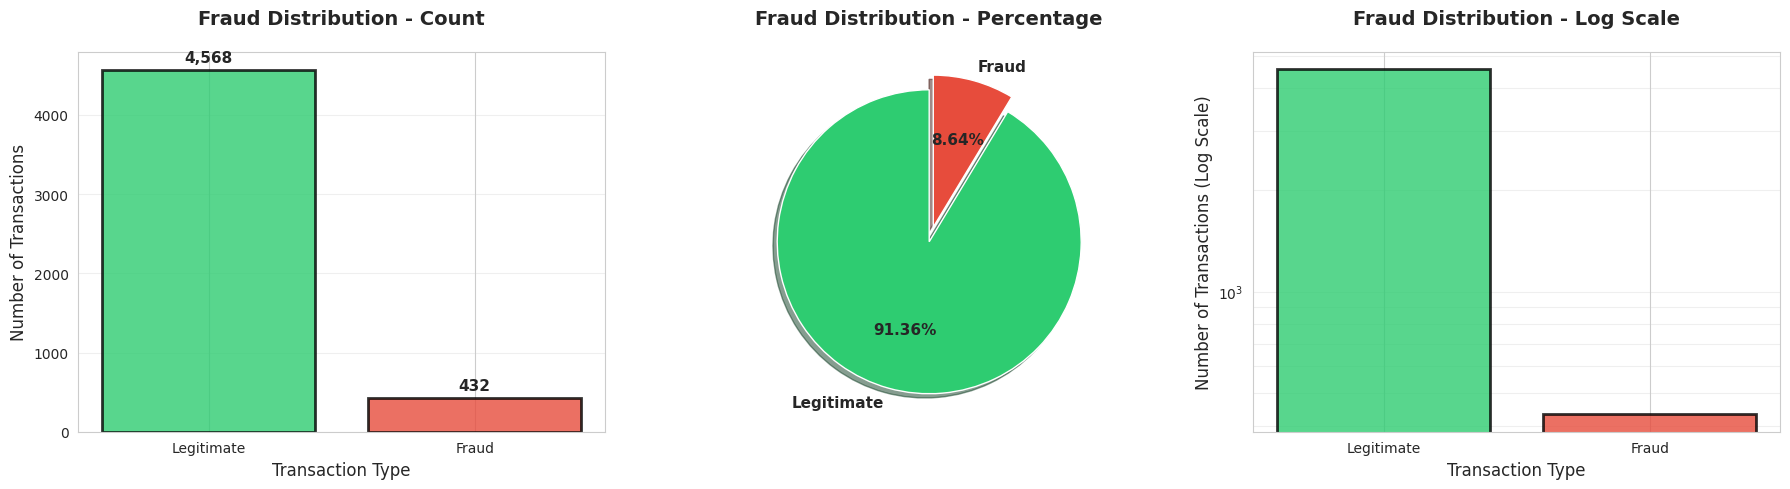

In [8]:
write_output("5. TARGET VARIABLE ANALYSIS - FRAUD DETECTION")
fraud_counts = df['is_fraud'].value_counts().sort_index()
fraud_percentage = df['is_fraud'].value_counts(normalize=True).sort_index() * 100

write_output("\nFraud Distribution:")
write_output(f"  Legitimate Transactions (0): {fraud_counts[0]:,} ({fraud_percentage[0]:.2f}%)")
write_output(f"  Fraudulent Transactions (1): {fraud_counts[1]:,} ({fraud_percentage[1]:.2f}%)")
write_output(f"\n  Fraud Rate: {fraud_percentage[1]:.2f}%")
write_output(f"  Class Imbalance Ratio: 1:{fraud_counts[0]/fraud_counts[1]:.2f}")

# Visualization - Fraud Distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Count plot
axes[0].bar(['Legitimate', 'Fraud'], fraud_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black', linewidth=2)
axes[0].set_title('Fraud Distribution - Count', fontsize=14, fontweight='bold', pad=20)
axes[0].set_ylabel('Number of Transactions', fontsize=12)
axes[0].set_xlabel('Transaction Type', fontsize=12)
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0, 0.1)
axes[1].pie(fraud_counts.values, labels=['Legitimate', 'Fraud'], autopct='%1.2f%%',
            colors=colors, startangle=90, explode=explode, shadow=True, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Fraud Distribution - Percentage', fontsize=14, fontweight='bold', pad=20)

# Log scale comparison
axes[2].bar(['Legitimate', 'Fraud'], fraud_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black', linewidth=2)
axes[2].set_yscale('log')
axes[2].set_title('Fraud Distribution - Log Scale', fontsize=14, fontweight='bold', pad=20)
axes[2].set_ylabel('Number of Transactions (Log Scale)', fontsize=12)
axes[2].set_xlabel('Transaction Type', fontsize=12)
axes[2].grid(axis='y', alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('01_fraud_distribution.png', dpi=300, bbox_inches='tight')
write_output("\n📊 Saved: 01_fraud_distribution.png")


# 6. NUMERICAL FEATURES DETAILED ANALYSIS

6. NUMERICAL FEATURES DETAILED ANALYSIS

--- ACCOUNT_AGE_DAYS ---
  Count: 5,000
  Mean: 1498.91
  Median: 1481.50
  Std Dev: 867.62
  Min: 10.00
  25th Percentile: 732.00
  75th Percentile: 2254.25
  Max: 2999.00
  IQR: 1522.25
  Skewness: 0.02
  Kurtosis: -1.22

--- TRANSACTION_AMOUNT ---
  Count: 5,000
  Mean: 39283.32
  Median: 9670.00
  Std Dev: 70330.37
  Min: 1054.00
  25th Percentile: 6000.50
  75th Percentile: 20324.75
  Max: 299992.00
  IQR: 14324.25
  Skewness: 2.32
  Kurtosis: 4.18

--- HOUR ---
  Count: 5,000
  Mean: 11.63
  Median: 12.00
  Std Dev: 6.84
  Min: 0.00
  25th Percentile: 6.00
  75th Percentile: 17.00
  Max: 23.00
  IQR: 11.00
  Skewness: -0.02
  Kurtosis: -1.17

--- WEEKDAY ---
  Count: 5,000
  Mean: 3.10
  Median: 3.00
  Std Dev: 2.08
  Min: 0.00
  25th Percentile: 1.00
  75th Percentile: 5.00
  Max: 6.00
  IQR: 4.00
  Skewness: -0.12
  Kurtosis: -1.32

--- MONTH ---
  Count: 5,000
  Mean: 8.00
  Median: 8.00
  Std Dev: 0.00
  Min: 8.00
  25th Percentile: 8.

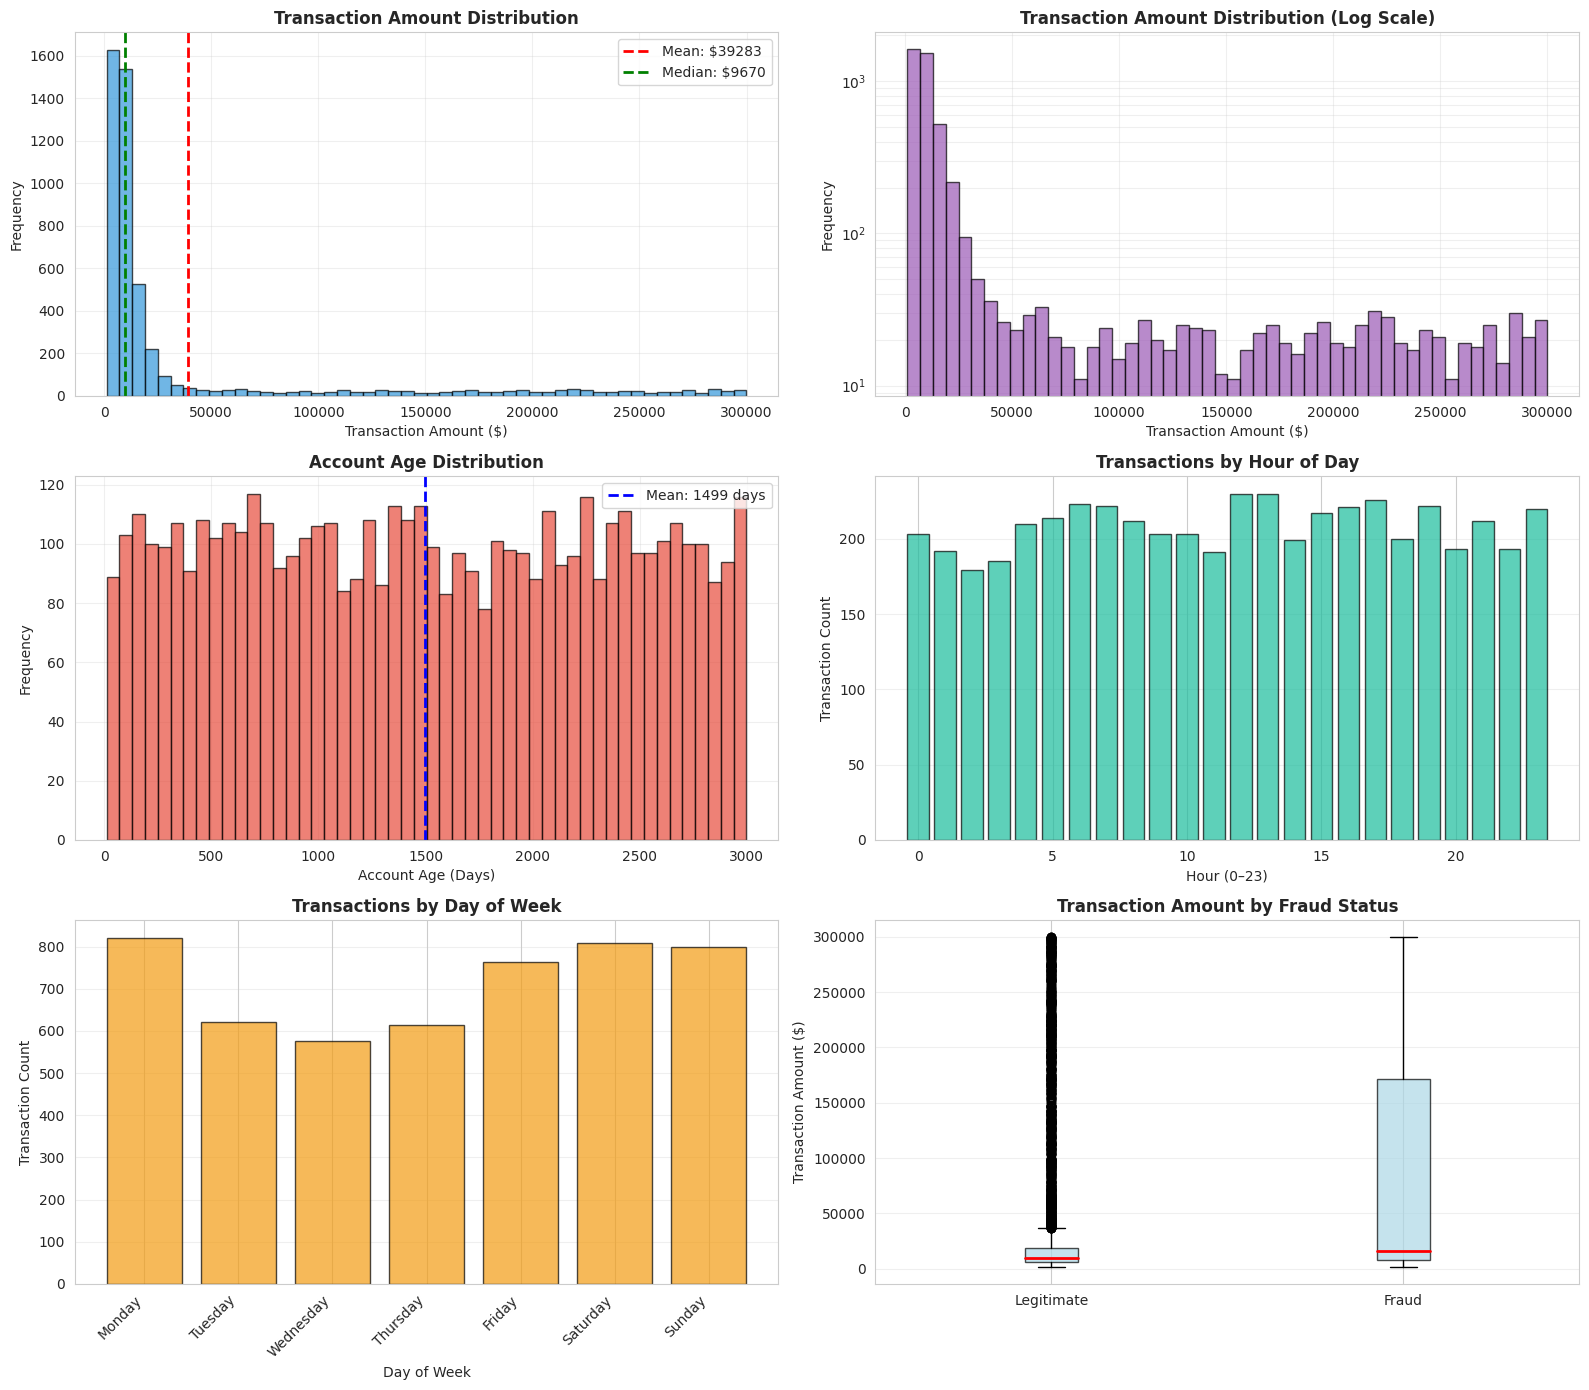

In [9]:
import matplotlib.pyplot as plt

write_output("6. NUMERICAL FEATURES DETAILED ANALYSIS")

# --- Summary statistics for numerical features ---
numerical_cols = ['account_age_days', 'transaction_amount', 'hour', 'weekday',
                  'month', 'transaction_amount_log']

for col in numerical_cols:
    write_output(f"\n--- {col.upper()} ---")
    write_output(f"  Count: {df[col].count():,}")
    write_output(f"  Mean: {df[col].mean():.2f}")
    write_output(f"  Median: {df[col].median():.2f}")
    write_output(f"  Std Dev: {df[col].std():.2f}")
    write_output(f"  Min: {df[col].min():.2f}")
    write_output(f"  25th Percentile: {df[col].quantile(0.25):.2f}")
    write_output(f"  75th Percentile: {df[col].quantile(0.75):.2f}")
    write_output(f"  Max: {df[col].max():.2f}")
    write_output(f"  IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")
    write_output(f"  Skewness: {df[col].skew():.2f}")
    write_output(f"  Kurtosis: {df[col].kurtosis():.2f}")

# --- Distribution plots for key numerical features ---
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# 1️. Transaction Amount
axes[0, 0].hist(df['transaction_amount'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Transaction Amount Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Transaction Amount ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['transaction_amount'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: ${df["transaction_amount"].mean():.0f}')
axes[0, 0].axvline(df['transaction_amount'].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Median: ${df["transaction_amount"].median():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2️. Transaction Amount (Log Scale)
axes[0, 1].hist(df['transaction_amount'], bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Transaction Amount Distribution (Log Scale)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Transaction Amount ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(alpha=0.3, which='both')

# 3️. Account Age
axes[1, 0].hist(df['account_age_days'], bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Account Age Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Account Age (Days)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['account_age_days'].mean(), color='blue', linestyle='--', linewidth=2,
                   label=f'Mean: {df["account_age_days"].mean():.0f} days')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4️. Hour Distribution
hour_counts = df['hour'].value_counts().sort_index()
axes[1, 1].bar(hour_counts.index, hour_counts.values, color='#1abc9c', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Transactions by Hour of Day', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Hour (0–23)')
axes[1, 1].set_ylabel('Transaction Count')
axes[1, 1].grid(axis='y', alpha=0.3)

# 5️. Weekday Distribution
weekday_counts = df['weekday'].value_counts().sort_index()
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[2, 0].bar(range(len(weekday_counts)), weekday_counts.values, color='#f39c12', edgecolor='black', alpha=0.7)
axes[2, 0].set_title('Transactions by Day of Week', fontsize=12, fontweight='bold')
axes[2, 0].set_xlabel('Day of Week')
axes[2, 0].set_ylabel('Transaction Count')
axes[2, 0].set_xticks(range(7))
axes[2, 0].set_xticklabels(weekday_labels, rotation=45, ha='right')
axes[2, 0].grid(axis='y', alpha=0.3)

# 6️. Boxplot: Fraud vs Legitimate
axes[2, 1].boxplot(
    [df[df['is_fraud'] == 0]['transaction_amount'],
     df[df['is_fraud'] == 1]['transaction_amount']],
    labels=['Legitimate', 'Fraud'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', alpha=0.7),
    medianprops=dict(color='red', linewidth=2)
)
axes[2, 1].set_title('Transaction Amount by Fraud Status', fontsize=12, fontweight='bold')
axes[2, 1].set_ylabel('Transaction Amount ($)')
axes[2, 1].grid(axis='y', alpha=0.3)

# --- Final formatting and save ---
plt.tight_layout()
plt.savefig('02_numerical_features_analysis.png', dpi=300, bbox_inches='tight')
write_output("\nSaved: 02_numerical_features_analysis.png")
plt.show()


# 7. FRAUD ANALYSIS BY NUMERICAL FEATURES

7. FRAUD ANALYSIS BY NUMERICAL FEATURES

--- TRANSACTION_AMOUNT BY FRAUD STATUS ---

  Legitimate Transactions:
    Mean: 34769.61
    Median: 9424.00
    Std Dev: 65358.83

  Fraudulent Transactions:
    Mean: 87011.64
    Median: 16264.50
    Std Dev: 98013.93

  Difference (Fraud - Legitimate):
    Mean Difference: 52242.03
    Median Difference: 6840.50

--- ACCOUNT_AGE_DAYS BY FRAUD STATUS ---

  Legitimate Transactions:
    Mean: 1504.05
    Median: 1488.00
    Std Dev: 868.13

  Fraudulent Transactions:
    Mean: 1444.49
    Median: 1404.50
    Std Dev: 861.32

  Difference (Fraud - Legitimate):
    Mean Difference: -59.56
    Median Difference: -83.50

--- HOUR BY FRAUD STATUS ---

  Legitimate Transactions:
    Mean: 11.62
    Median: 12.00
    Std Dev: 6.84

  Fraudulent Transactions:
    Mean: 11.72
    Median: 12.00
    Std Dev: 6.87

  Difference (Fraud - Legitimate):
    Mean Difference: 0.10
    Median Difference: 0.00

--- WEEKDAY BY FRAUD STATUS ---

  Legitimate Trans

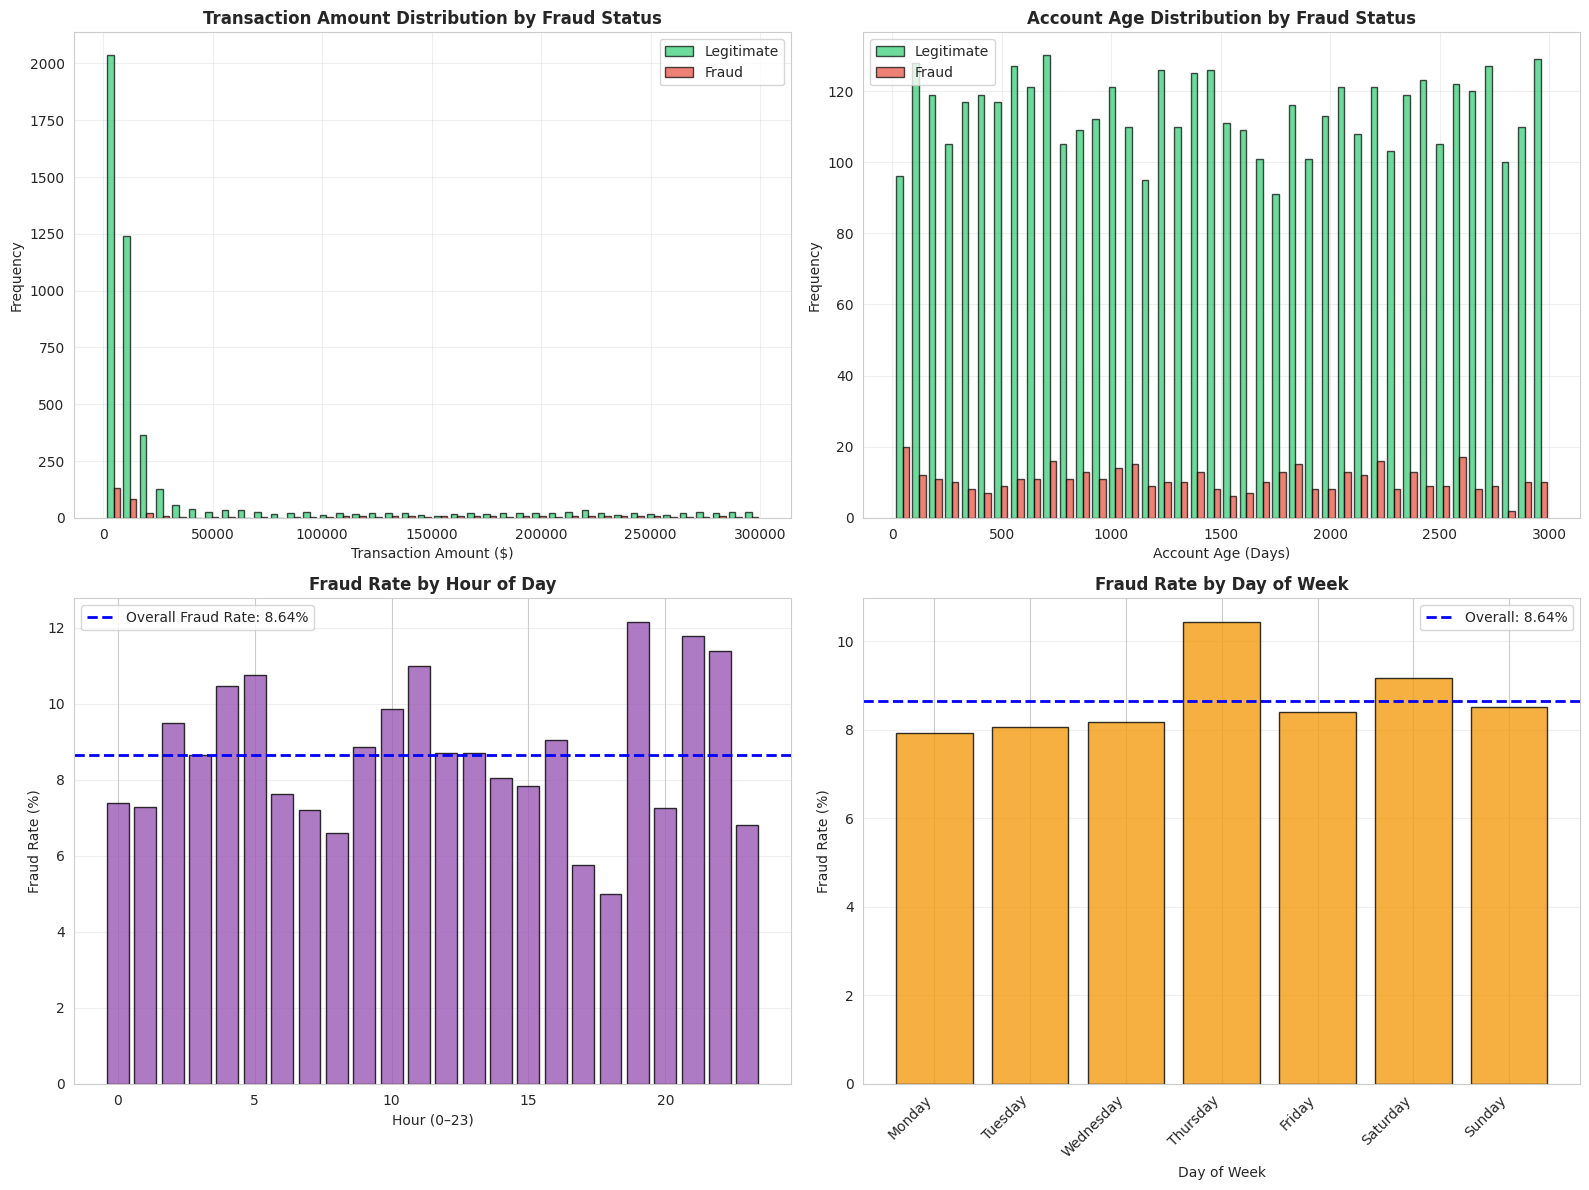

In [10]:
import matplotlib.pyplot as plt

write_output("7. FRAUD ANALYSIS BY NUMERICAL FEATURES")

# --- Numerical comparison between legitimate and fraudulent transactions ---
for col in ['transaction_amount', 'account_age_days', 'hour', 'weekday']:
    write_output(f"\n--- {col.upper()} BY FRAUD STATUS ---")

    legitimate = df[df['is_fraud'] == 0][col]
    fraud = df[df['is_fraud'] == 1][col]

    write_output(f"\n  Legitimate Transactions:")
    write_output(f"    Mean: {legitimate.mean():.2f}")
    write_output(f"    Median: {legitimate.median():.2f}")
    write_output(f"    Std Dev: {legitimate.std():.2f}")

    write_output(f"\n  Fraudulent Transactions:")
    write_output(f"    Mean: {fraud.mean():.2f}")
    write_output(f"    Median: {fraud.median():.2f}")
    write_output(f"    Std Dev: {fraud.std():.2f}")

    write_output(f"\n  Difference (Fraud - Legitimate):")
    write_output(f"    Mean Difference: {fraud.mean() - legitimate.mean():.2f}")
    write_output(f"    Median Difference: {fraud.median() - legitimate.median():.2f}")

# --- Visualization setup ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Overall fraud rate (for reference lines)
fraud_percentage = df['is_fraud'].value_counts(normalize=True) * 100
fraud_overall_rate = fraud_percentage.get(1, 0)

# 1️⃣ Transaction Amount Comparison
axes[0, 0].hist(
    [df[df['is_fraud'] == 0]['transaction_amount'],
     df[df['is_fraud'] == 1]['transaction_amount']],
    bins=40,
    label=['Legitimate', 'Fraud'],
    color=['#2ecc71', '#e74c3c'],
    alpha=0.7,
    edgecolor='black'
)
axes[0, 0].set_title('Transaction Amount Distribution by Fraud Status', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Transaction Amount ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2️⃣ Account Age Comparison
axes[0, 1].hist(
    [df[df['is_fraud'] == 0]['account_age_days'],
     df[df['is_fraud'] == 1]['account_age_days']],
    bins=40,
    label=['Legitimate', 'Fraud'],
    color=['#2ecc71', '#e74c3c'],
    alpha=0.7,
    edgecolor='black'
)
axes[0, 1].set_title('Account Age Distribution by Fraud Status', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Account Age (Days)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3️⃣ Fraud Rate by Hour
hour_fraud_rate = df.groupby('hour')['is_fraud'].agg(['sum', 'count'])
hour_fraud_rate['rate'] = (hour_fraud_rate['sum'] / hour_fraud_rate['count']) * 100

axes[1, 0].bar(hour_fraud_rate.index, hour_fraud_rate['rate'], color='#9b59b6', edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Fraud Rate by Hour of Day', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Hour (0–23)')
axes[1, 0].set_ylabel('Fraud Rate (%)')
axes[1, 0].axhline(fraud_overall_rate, color='blue', linestyle='--', linewidth=2,
                   label=f'Overall Fraud Rate: {fraud_overall_rate:.2f}%')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4️⃣ Fraud Rate by Weekday
weekday_fraud_rate = df.groupby('weekday')['is_fraud'].agg(['sum', 'count'])
weekday_fraud_rate['rate'] = (weekday_fraud_rate['sum'] / weekday_fraud_rate['count']) * 100

weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[1, 1].bar(range(len(weekday_fraud_rate)), weekday_fraud_rate['rate'],
               color='#f39c12', edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Fraud Rate by Day of Week', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Fraud Rate (%)')
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(weekday_labels, rotation=45, ha='right')
axes[1, 1].axhline(fraud_overall_rate, color='blue', linestyle='--', linewidth=2,
                   label=f'Overall: {fraud_overall_rate:.2f}%')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

# --- Save and show ---
plt.tight_layout()
plt.savefig('03_fraud_by_numerical_features.png', dpi=300, bbox_inches='tight')
write_output("\n📊 Saved: 03_fraud_by_numerical_features.png")
plt.show()


# 8. CATEGORICAL FEATURES ANALYSIS (ONE-HOT ENCODED)

8. CATEGORICAL FEATURES ANALYSIS

--- TRANSACTION CHANNEL ANALYSIS ---
  ATM: 490 transactions (9.80%)
  MOBILE: 1,992 transactions (39.84%)
  POS: 784 transactions (15.68%)
  WEB: 1,734 transactions (34.68%)

--- KYC VERIFICATION ANALYSIS ---
  NO: 790 transactions (15.80%)
  YES: 4,210 transactions (84.20%)

📊 Saved: 04_categorical_features_analysis.png


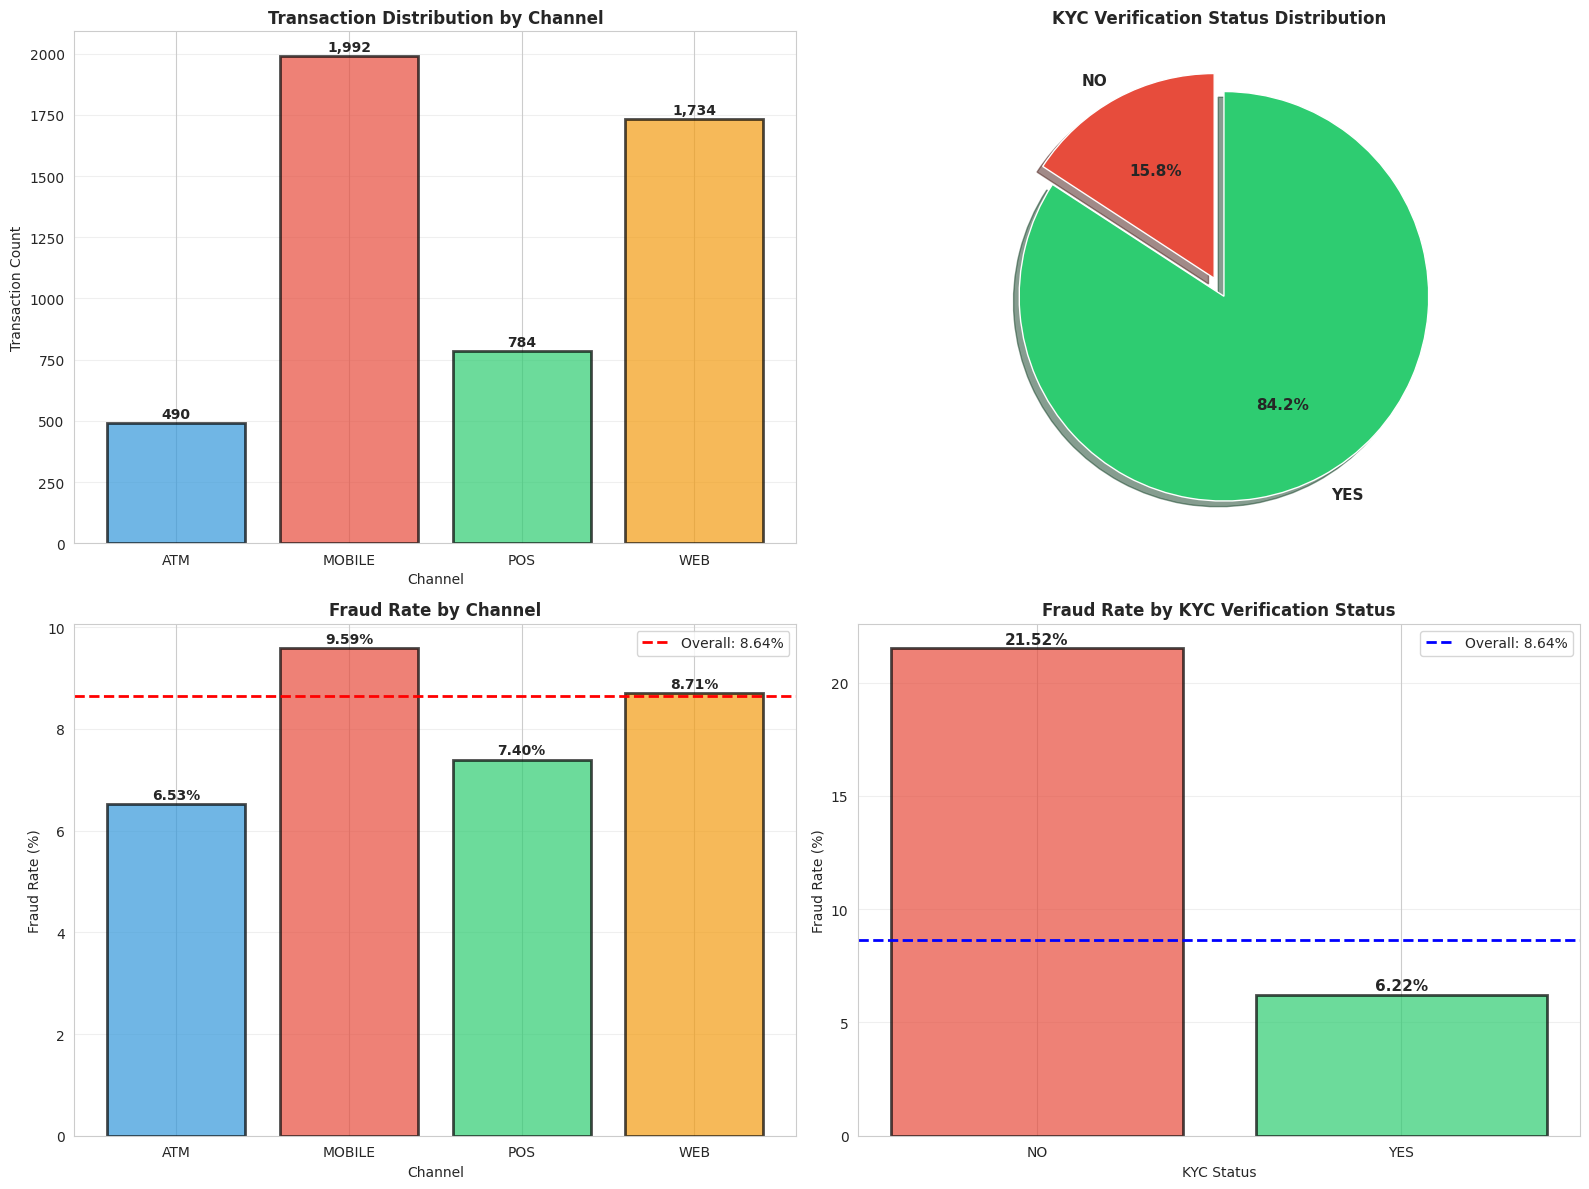


--- FRAUD RATE BY CHANNEL ---
  ATM: 6.53%
  MOBILE: 9.59%
  POS: 7.40%
  WEB: 8.71%

--- FRAUD RATE BY KYC STATUS ---
  NO: 21.52%
  YES: 6.22%


In [11]:
import matplotlib.pyplot as plt

write_output("8. CATEGORICAL FEATURES ANALYSIS")

# ---------------------------
# 1️⃣ TRANSACTION CHANNEL ANALYSIS
# ---------------------------
write_output("\n--- TRANSACTION CHANNEL ANALYSIS ---")

channel_cols = [col for col in df.columns if col.startswith('channel_')]
channel_data = {}

if channel_cols:
    for col in channel_cols:
        channel_name = col.replace('channel_', '').upper()
        count = df[col].sum()
        percentage = (count / len(df)) * 100
        channel_data[channel_name] = {'count': count, 'percentage': percentage}
        write_output(f"  {channel_name}: {int(count):,} transactions ({percentage:.2f}%)")
else:
    write_output("  ⚠️ No channel columns found (columns starting with 'channel_').")

# ---------------------------
# 2️⃣ KYC VERIFICATION ANALYSIS
# ---------------------------
write_output("\n--- KYC VERIFICATION ANALYSIS ---")

kyc_cols = [col for col in df.columns if col.startswith('kyc_verified_')]
kyc_data = {}

if kyc_cols:
    for col in kyc_cols:
        kyc_status = col.replace('kyc_verified_', '').upper()
        count = df[col].sum()
        percentage = (count / len(df)) * 100
        kyc_data[kyc_status] = {'count': count, 'percentage': percentage}
        write_output(f"  {kyc_status}: {int(count):,} transactions ({percentage:.2f}%)")
else:
    write_output("  ⚠️ No KYC verification columns found (columns starting with 'kyc_verified_').")

# ---------------------------
# 3️⃣ VISUALIZATION
# ---------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Handle missing data gracefully
fraud_percentage = df['is_fraud'].value_counts(normalize=True) * 100
fraud_overall_rate = fraud_percentage.get(1, 0)

# --- Channel Distribution ---
if channel_data:
    channel_names = list(channel_data.keys())
    channel_counts = [channel_data[ch]['count'] for ch in channel_names]
    colors_channel = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

    axes[0, 0].bar(channel_names, channel_counts,
                   color=colors_channel[:len(channel_names)],
                   edgecolor='black', alpha=0.7, linewidth=2)
    axes[0, 0].set_title('Transaction Distribution by Channel', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Channel')
    axes[0, 0].set_ylabel('Transaction Count')
    for i, v in enumerate(channel_counts):
        axes[0, 0].text(i, v + (max(channel_counts) * 0.01), f'{int(v):,}', ha='center', fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'No Channel Data', ha='center', va='center', fontsize=14, color='red')
    axes[0, 0].axis('off')

# --- KYC Distribution (Pie Chart) ---
if kyc_data:
    kyc_names = list(kyc_data.keys())
    kyc_counts = [kyc_data[kyc]['count'] for kyc in kyc_names]
    explode = [0.05] * len(kyc_names)

    axes[0, 1].pie(kyc_counts, labels=kyc_names, autopct='%1.1f%%',
                   colors=['#e74c3c', '#2ecc71', '#f39c12'][:len(kyc_names)],
                   startangle=90, explode=explode, shadow=True,
                   textprops={'fontsize': 11, 'fontweight': 'bold'})
    axes[0, 1].set_title('KYC Verification Status Distribution', fontsize=12, fontweight='bold')
else:
    axes[0, 1].text(0.5, 0.5, 'No KYC Data', ha='center', va='center', fontsize=14, color='red')
    axes[0, 1].axis('off')

# --- Fraud Rate by Channel ---
if channel_cols:
    channel_fraud_rates = {}
    for col in channel_cols:
        channel_name = col.replace('channel_', '').upper()
        if df[col].sum() > 0:
            fraud_rate = (df[df[col] == 1]['is_fraud'].sum() / df[col].sum()) * 100
        else:
            fraud_rate = 0
        channel_fraud_rates[channel_name] = fraud_rate

    channel_fraud_names = list(channel_fraud_rates.keys())
    channel_fraud_values = list(channel_fraud_rates.values())

    axes[1, 0].bar(channel_fraud_names, channel_fraud_values,
                   color=colors_channel[:len(channel_fraud_names)],
                   edgecolor='black', alpha=0.7, linewidth=2)
    axes[1, 0].set_title('Fraud Rate by Channel', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Channel')
    axes[1, 0].set_ylabel('Fraud Rate (%)')
    axes[1, 0].axhline(fraud_overall_rate, color='red', linestyle='--', linewidth=2,
                       label=f'Overall: {fraud_overall_rate:.2f}%')
    for i, v in enumerate(channel_fraud_values):
        axes[1, 0].text(i, v + 0.1, f'{v:.2f}%', ha='center', fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(axis='y', alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'No Channel Fraud Data', ha='center', va='center', fontsize=14, color='red')
    axes[1, 0].axis('off')

# --- Fraud Rate by KYC Verification ---
if kyc_cols:
    kyc_fraud_rates = {}
    for col in kyc_cols:
        kyc_status = col.replace('kyc_verified_', '').upper()
        if df[col].sum() > 0:
            fraud_rate = (df[df[col] == 1]['is_fraud'].sum() / df[col].sum()) * 100
        else:
            fraud_rate = 0
        kyc_fraud_rates[kyc_status] = fraud_rate

    kyc_fraud_names = list(kyc_fraud_rates.keys())
    kyc_fraud_values = list(kyc_fraud_rates.values())

    axes[1, 1].bar(kyc_fraud_names, kyc_fraud_values,
                   color=['#e74c3c', '#2ecc71', '#f39c12'][:len(kyc_fraud_names)],
                   edgecolor='black', alpha=0.7, linewidth=2)
    axes[1, 1].set_title('Fraud Rate by KYC Verification Status', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('KYC Status')
    axes[1, 1].set_ylabel('Fraud Rate (%)')
    axes[1, 1].axhline(fraud_overall_rate, color='blue', linestyle='--', linewidth=2,
                       label=f'Overall: {fraud_overall_rate:.2f}%')
    for i, v in enumerate(kyc_fraud_values):
        axes[1, 1].text(i, v + 0.2, f'{v:.2f}%', ha='center', fontweight='bold', fontsize=11)
    axes[1, 1].legend()
    axes[1, 1].grid(axis='y', alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'No KYC Fraud Data', ha='center', va='center', fontsize=14, color='red')
    axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('04_categorical_features_analysis.png', dpi=300, bbox_inches='tight')
write_output("\n📊 Saved: 04_categorical_features_analysis.png")
plt.show()

# ---------------------------
# 4️⃣ DETAILED FRAUD REPORTS
# ---------------------------
if channel_cols:
    write_output("\n--- FRAUD RATE BY CHANNEL ---")
    for channel, rate in channel_fraud_rates.items():
        write_output(f"  {channel}: {rate:.2f}%")

if kyc_cols:
    write_output("\n--- FRAUD RATE BY KYC STATUS ---")
    for kyc, rate in kyc_fraud_rates.items():
        write_output(f"  {kyc}: {rate:.2f}%")


# 9. HIGH VALUE TRANSACTIONS ANALYSIS

9. HIGH VALUE TRANSACTIONS ANALYSIS

High Value Transactions: 882 (17.64%)
Regular Transactions: 4,118 (82.36%)

Fraud Rate in High Value Transactions: 21.20%
Fraud Rate in Regular Transactions: 5.95%
Difference: 15.25 percentage points

📊 Saved: 05_high_value_transactions_analysis.png


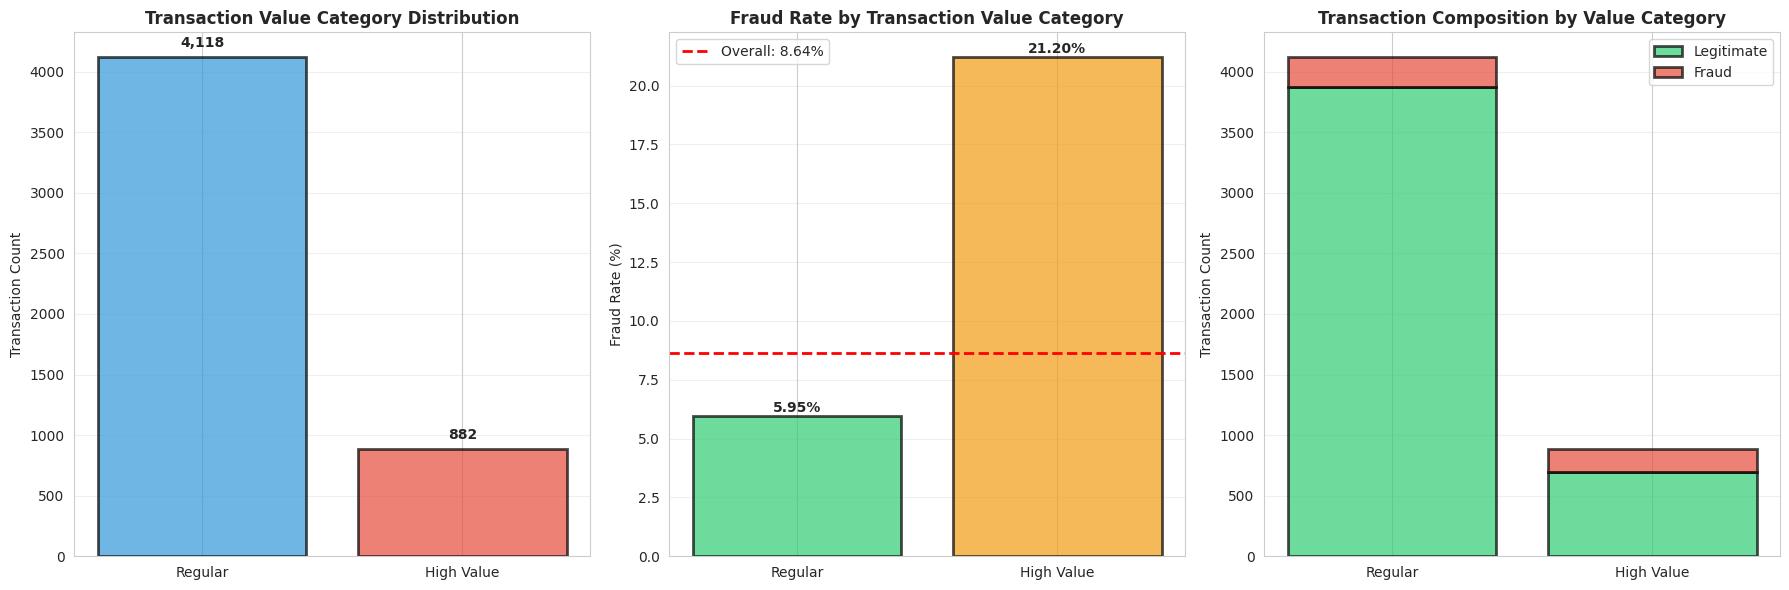

In [12]:
# =====================================================
# 9. HIGH VALUE TRANSACTIONS ANALYSIS
# =====================================================
write_output("9. HIGH VALUE TRANSACTIONS ANALYSIS")

# --- Summary Counts ---
high_value_count = df['is_high_value'].sum()
high_value_percentage = (high_value_count / len(df)) * 100
regular_count = len(df) - high_value_count
regular_percentage = 100 - high_value_percentage

write_output(f"\nHigh Value Transactions: {int(high_value_count):,} ({high_value_percentage:.2f}%)")
write_output(f"Regular Transactions: {int(regular_count):,} ({regular_percentage:.2f}%)")

# --- Fraud Rate Calculation ---
high_value_fraud_rate = (df[df['is_high_value'] == 1]['is_fraud'].sum() / high_value_count) * 100 if high_value_count > 0 else 0
regular_fraud_rate = (df[df['is_high_value'] == 0]['is_fraud'].sum() / regular_count) * 100 if regular_count > 0 else 0

write_output(f"\nFraud Rate in High Value Transactions: {high_value_fraud_rate:.2f}%")
write_output(f"Fraud Rate in Regular Transactions: {regular_fraud_rate:.2f}%")
write_output(f"Difference: {high_value_fraud_rate - regular_fraud_rate:.2f} percentage points")

# --- Visualization ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
# 1️⃣ Transaction Value Category Distribution
value_counts = df['is_high_value'].value_counts().sort_index()
ax1.bar(['Regular', 'High Value'], value_counts.values, 
        color=['#3498db', '#e74c3c'], edgecolor='black', alpha=0.7, linewidth=2)
ax1.set_title('Transaction Value Category Distribution', fontsize=12, fontweight='bold')
ax1.set_ylabel('Transaction Count')
for i, v in enumerate(value_counts.values):
    ax1.text(i, v + (max(value_counts.values) * 0.02), f'{int(v):,}', ha='center', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2️⃣ Fraud Rate by Transaction Value
fraud_rates = [regular_fraud_rate, high_value_fraud_rate]
ax2.bar(['Regular', 'High Value'], fraud_rates, 
        color=['#2ecc71', '#f39c12'], edgecolor='black', alpha=0.7, linewidth=2)
ax2.set_title('Fraud Rate by Transaction Value Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Fraud Rate (%)')
ax2.axhline(fraud_percentage[1], color='red', linestyle='--', linewidth=2, 
            label=f'Overall: {fraud_percentage[1]:.2f}%')
for i, v in enumerate(fraud_rates):
    ax2.text(i, v + 0.2, f'{v:.2f}%', ha='center', fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3️⃣ Stacked Bar: Fraud vs Legitimate Composition
high_value_legitimate = len(df[(df['is_high_value'] == 1) & (df['is_fraud'] == 0)])
high_value_fraud = len(df[(df['is_high_value'] == 1) & (df['is_fraud'] == 1)])
regular_legitimate = len(df[(df['is_high_value'] == 0) & (df['is_fraud'] == 0)])
regular_fraud = len(df[(df['is_high_value'] == 0) & (df['is_fraud'] == 1)])

categories = ['Regular', 'High Value']
legitimate_counts = [regular_legitimate, high_value_legitimate]
fraud_counts = [regular_fraud, high_value_fraud]

x_pos = np.arange(len(categories))
ax3.bar(x_pos, legitimate_counts, label='Legitimate', color='#2ecc71', 
        edgecolor='black', linewidth=2, alpha=0.7)
ax3.bar(x_pos, fraud_counts, bottom=legitimate_counts, label='Fraud', 
        color='#e74c3c', edgecolor='black', linewidth=2, alpha=0.7)
ax3.set_title('Transaction Composition by Value Category', fontsize=12, fontweight='bold')
ax3.set_ylabel('Transaction Count')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(categories)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# --- Save Visualization ---
plt.tight_layout()
plt.savefig('05_high_value_transactions_analysis.png', dpi=300, bbox_inches='tight')
write_output("\n📊 Saved: 05_high_value_transactions_analysis.png")
# plt.close()  # Keep open for display


# 10. TIME SERIES ANALYSIS

10. TIME SERIES ANALYSIS

Date Range:
  Start Date: 2025-08-01 00:19:59
  End Date: 2025-08-25 23:54:05
  Duration: 24 days

Daily Transaction Statistics:
  Average Daily Transactions: 200
  Average Daily Transaction Volume: $7,856,664
  Average Daily Fraud Cases: 17.3
  Average Daily Fraud Rate: 8.63%

📊 Saved: 06_time_series_analysis.png


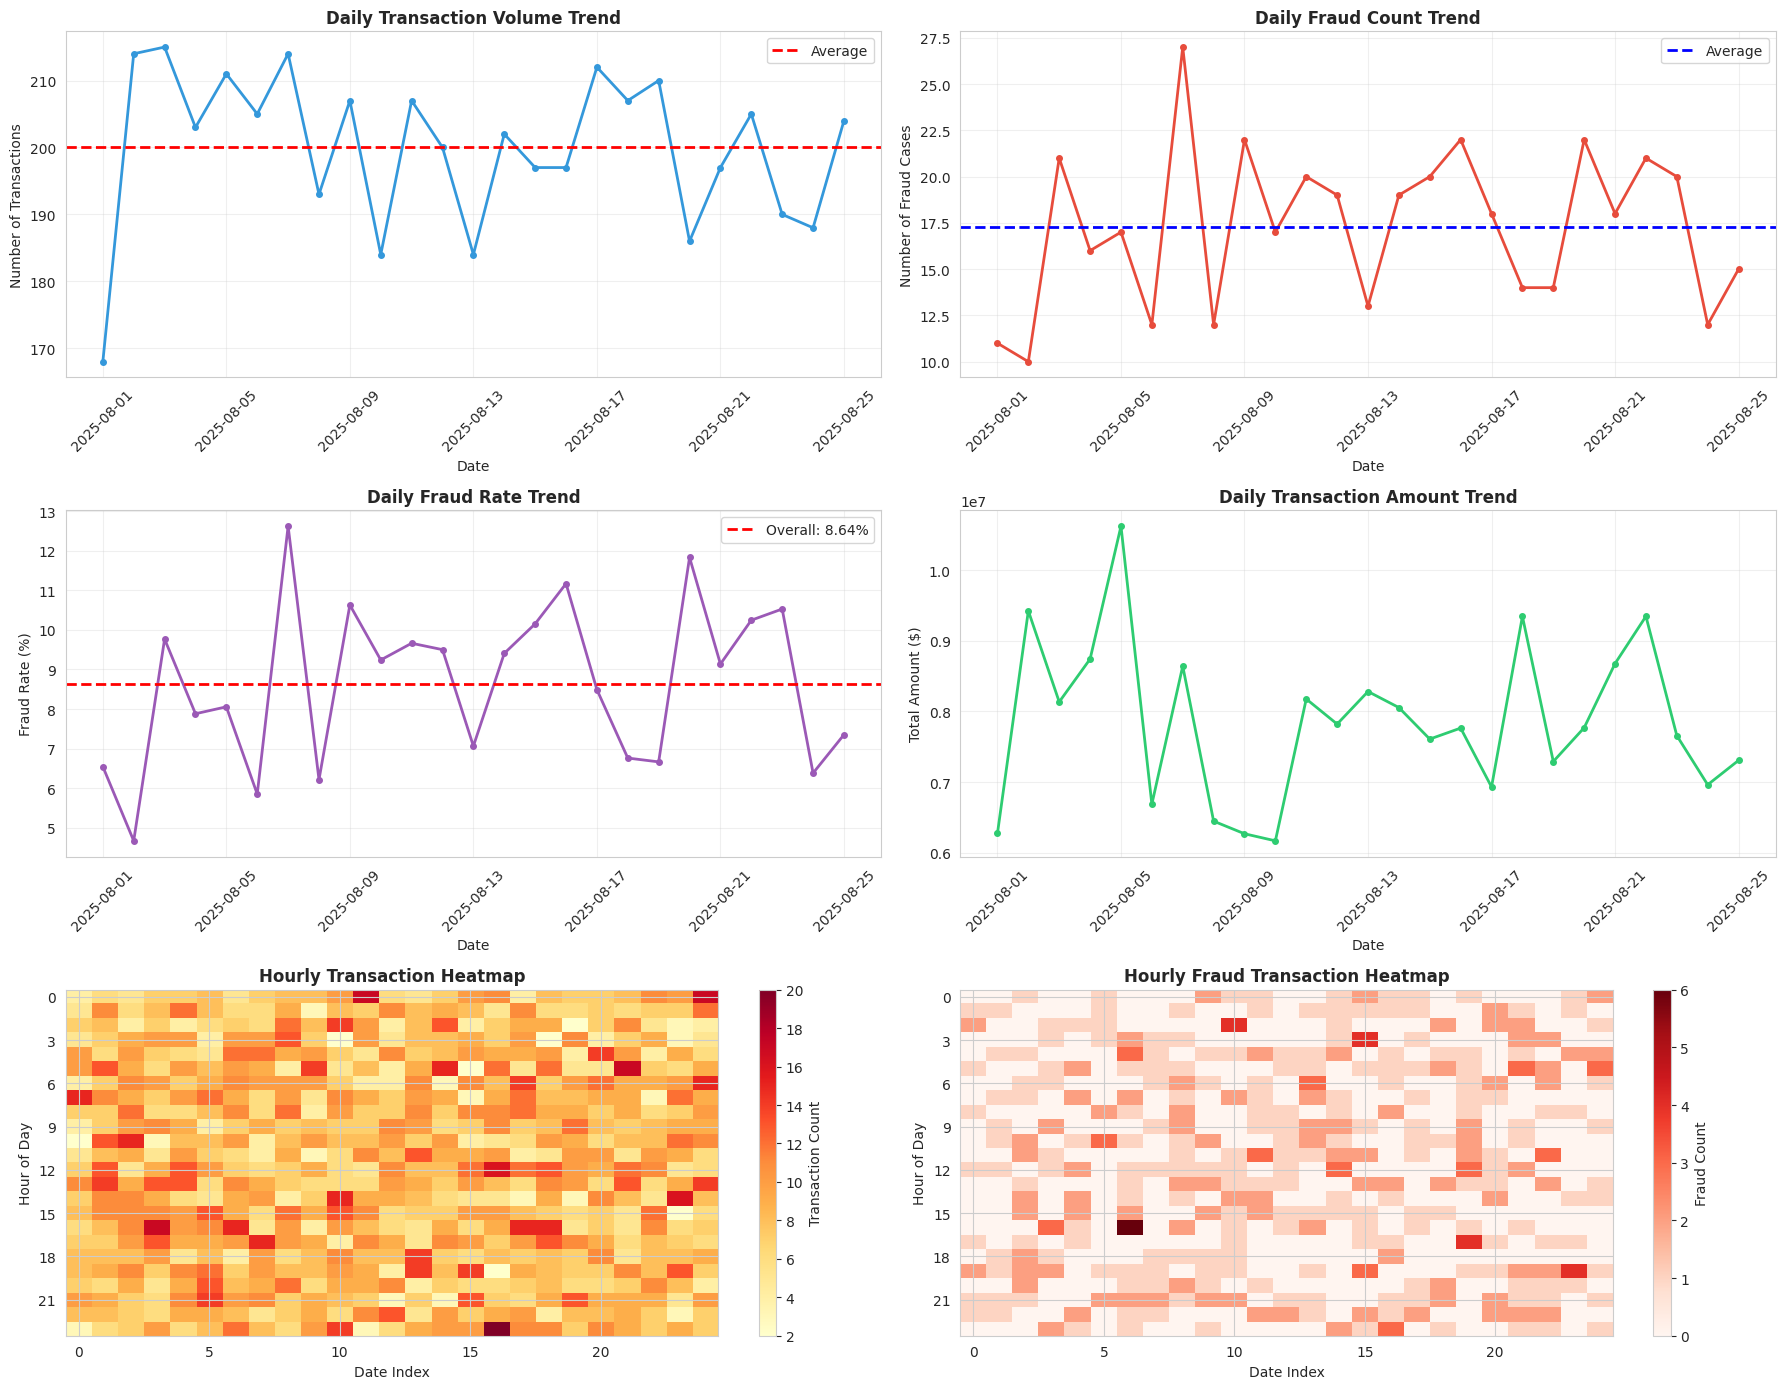

In [13]:
# =====================================================
# 10. TIME SERIES ANALYSIS
# =====================================================
write_output("10. TIME SERIES ANALYSIS")
write_output("=" * 80)

# --- Timestamp Preprocessing ---
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])  # Drop invalid timestamps if any
df['date'] = df['timestamp'].dt.date
df['day_of_month'] = df['timestamp'].dt.day

write_output("\nDate Range:")
write_output(f"  Start Date: {df['timestamp'].min()}")
write_output(f"  End Date: {df['timestamp'].max()}")
write_output(f"  Duration: {(df['timestamp'].max() - df['timestamp'].min()).days} days")

# --- Daily Aggregations ---
daily_stats = df.groupby('date').agg({
    'transaction_id': 'count',
    'transaction_amount': 'sum',
    'is_fraud': 'sum'
}).rename(columns={
    'transaction_id': 'total_transactions',
    'transaction_amount': 'total_amount',
    'is_fraud': 'fraud_count'
})

daily_stats['fraud_rate'] = (daily_stats['fraud_count'] / daily_stats['total_transactions']) * 100

write_output(f"\nDaily Transaction Statistics:")
write_output(f"  Average Daily Transactions: {daily_stats['total_transactions'].mean():.0f}")
write_output(f"  Average Daily Transaction Volume: ${daily_stats['total_amount'].mean():,.0f}")
write_output(f"  Average Daily Fraud Cases: {daily_stats['fraud_count'].mean():.1f}")
write_output(f"  Average Daily Fraud Rate: {daily_stats['fraud_rate'].mean():.2f}%")

# --- Visualization ---
fig, axes = plt.subplots(3, 2, figsize=(18, 14))

# 1️⃣ Daily Transaction Volume Trend
axes[0, 0].plot(daily_stats.index, daily_stats['total_transactions'], marker='o',
                color='#3498db', linewidth=2, markersize=4)
axes[0, 0].set_title('Daily Transaction Volume Trend', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].axhline(daily_stats['total_transactions'].mean(), color='red', linestyle='--', linewidth=2, label='Average')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2️⃣ Daily Fraud Count Trend
axes[0, 1].plot(daily_stats.index, daily_stats['fraud_count'], marker='o',
                color='#e74c3c', linewidth=2, markersize=4)
axes[0, 1].set_title('Daily Fraud Count Trend', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Fraud Cases')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].axhline(daily_stats['fraud_count'].mean(), color='blue', linestyle='--', linewidth=2, label='Average')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3️⃣ Daily Fraud Rate Trend
axes[1, 0].plot(daily_stats.index, daily_stats['fraud_rate'], marker='o',
                color='#9b59b6', linewidth=2, markersize=4)
axes[1, 0].set_title('Daily Fraud Rate Trend', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Fraud Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].axhline(fraud_percentage[1], color='red', linestyle='--', linewidth=2,
                   label=f'Overall: {fraud_percentage[1]:.2f}%')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4️⃣ Daily Total Amount Trend
axes[1, 1].plot(daily_stats.index, daily_stats['total_amount'], marker='o',
                color='#2ecc71', linewidth=2, markersize=4)
axes[1, 1].set_title('Daily Transaction Amount Trend', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Total Amount ($)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(alpha=0.3)

# 5️⃣ Hourly Heatmap – Total Transactions
hourly_daily = df.groupby(['date', 'hour']).size().unstack(fill_value=0)
im1 = axes[2, 0].imshow(hourly_daily.T, aspect='auto', cmap='YlOrRd', interpolation='nearest')
axes[2, 0].set_title('Hourly Transaction Heatmap', fontsize=12, fontweight='bold')
axes[2, 0].set_xlabel('Date Index')
axes[2, 0].set_ylabel('Hour of Day')
axes[2, 0].set_yticks(range(0, 24, 3))
axes[2, 0].set_yticklabels(range(0, 24, 3))
plt.colorbar(im1, ax=axes[2, 0], label='Transaction Count')

# 6️⃣ Hourly Heatmap – Fraud Transactions
hourly_daily_fraud = df[df['is_fraud'] == 1].groupby(['date', 'hour']).size().unstack(fill_value=0)
im2 = axes[2, 1].imshow(hourly_daily_fraud.T, aspect='auto', cmap='Reds', interpolation='nearest')
axes[2, 1].set_title('Hourly Fraud Transaction Heatmap', fontsize=12, fontweight='bold')
axes[2, 1].set_xlabel('Date Index')
axes[2, 1].set_ylabel('Hour of Day')
axes[2, 1].set_yticks(range(0, 24, 3))
axes[2, 1].set_yticklabels(range(0, 24, 3))
plt.colorbar(im2, ax=axes[2, 1], label='Fraud Count')

# --- Save Plot ---
plt.tight_layout()
plt.savefig('06_time_series_analysis.png', dpi=300, bbox_inches='tight')
write_output("\n📊 Saved: 06_time_series_analysis.png")
# plt.close()  # Keep plot open for notebook display


# 11. CORRELATION ANALYSIS

11. CORRELATION ANALYSIS

Correlation with Fraud (is_fraud):
  transaction_amount            :  0.2087
  is_high_value                 :  0.2069
  transaction_amount_log        :  0.1916
  weekday                       :  0.0107
  hour                          :  0.0041
  account_age_days              : -0.0193
  month                         :     nan

Top 10 Strongest Correlations (excluding self-correlation):
   1. account_age_days          ↔ month                    :     nan
   2. transaction_amount        ↔ month                    :     nan
   3. transaction_amount        ↔ transaction_amount_log   :  0.8917
   4. transaction_amount        ↔ is_high_value            :  0.8916
   5. transaction_amount        ↔ is_fraud                 :  0.2087
   6. account_age_days          ↔ hour                     : -0.0253
   7. transaction_amount        ↔ weekday                  : -0.0245
   8. account_age_days          ↔ is_fraud                 : -0.0193
   9. hour                      

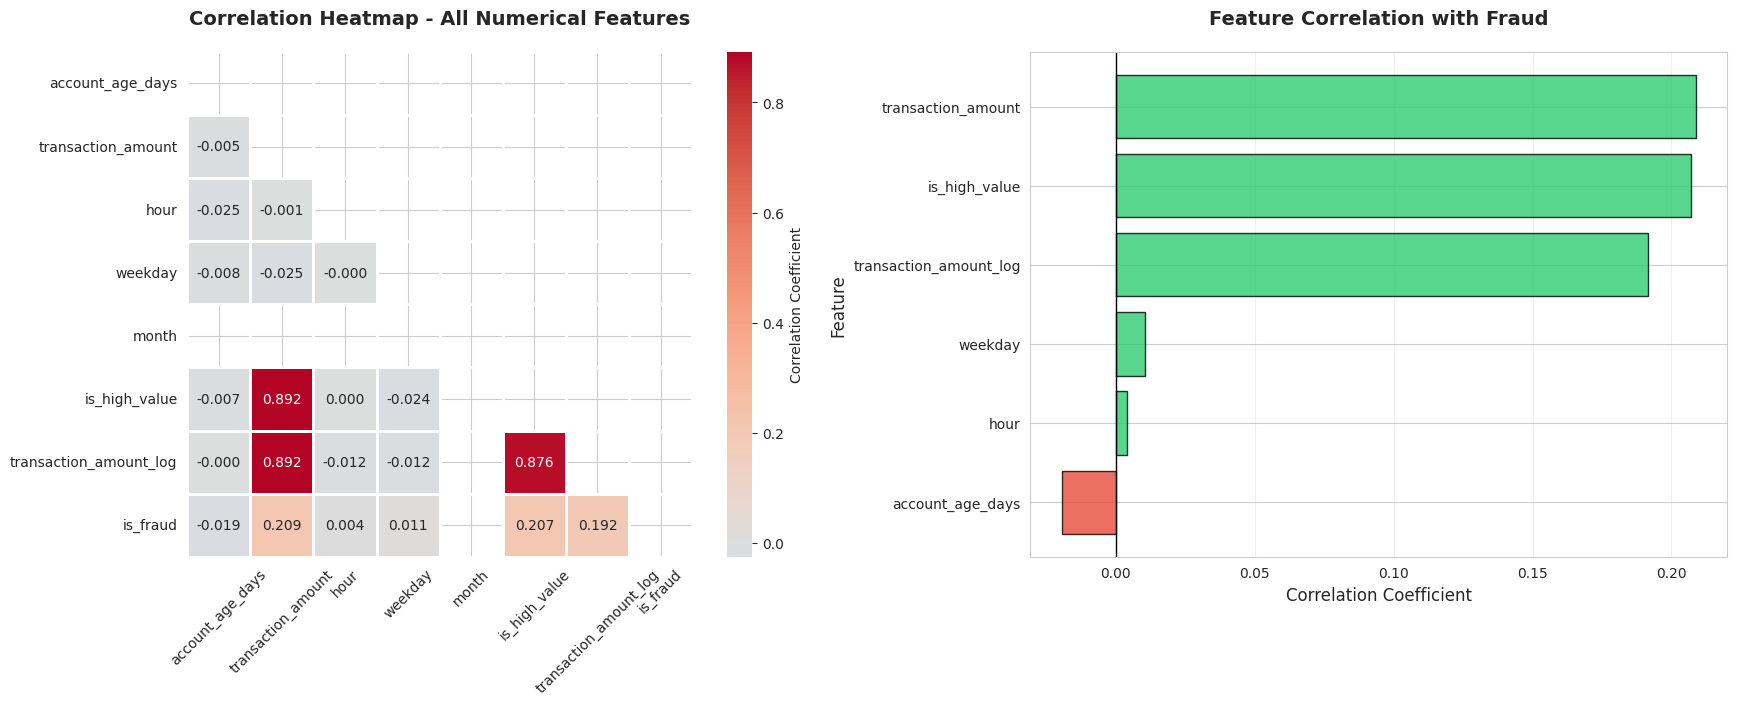

In [14]:
write_output("11. CORRELATION ANALYSIS")
write_output("="*80)

# Select numerical columns for correlation
corr_cols = [
    'account_age_days', 'transaction_amount', 'hour', 'weekday', 'month',
    'is_high_value', 'transaction_amount_log', 'is_fraud'
]
correlation_matrix = df[corr_cols].corr()

# Correlation with Fraud
write_output("\nCorrelation with Fraud (is_fraud):")
fraud_correlations = correlation_matrix['is_fraud'].sort_values(ascending=False)
for idx, value in fraud_correlations.items():
    if idx != 'is_fraud':
        write_output(f"  {idx:30s}: {value:7.4f}")

# Top 10 Strongest Correlations
write_output("\nTop 10 Strongest Correlations (excluding self-correlation):")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_pairs.append((
            correlation_matrix.columns[i],
            correlation_matrix.columns[j],
            correlation_matrix.iloc[i, j]
        ))
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for i, (col1, col2, corr_val) in enumerate(corr_pairs[:10], 1):
    write_output(f"  {i:2d}. {col1:25s} ↔ {col2:25s}: {corr_val:7.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Correlation Heatmap ---
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
    square=True, linewidths=0.8, fmt='.3f', ax=axes[0],
    cbar_kws={'label': 'Correlation Coefficient'}
)
axes[0].set_title('Correlation Heatmap - All Numerical Features', fontsize=14, fontweight='bold', pad=20)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# --- Fraud Correlation Bar Plot ---
fraud_corr_sorted = fraud_correlations.drop('is_fraud').sort_values()
colors_corr = ['#e74c3c' if x < 0 else '#2ecc71' for x in fraud_corr_sorted.values]
axes[1].barh(fraud_corr_sorted.index, fraud_corr_sorted.values, color=colors_corr, edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Correlation Coefficient', fontsize=12)
axes[1].set_ylabel('Feature', fontsize=12)
axes[1].set_title('Feature Correlation with Fraud', fontsize=14, fontweight='bold', pad=20)
axes[1].axvline(0, color='black', linewidth=1)
axes[1].grid(axis='x', alpha=0.3)
axes[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.savefig('07_correlation_analysis.png', dpi=300, bbox_inches='tight')
write_output("\n📊 Saved: 07_correlation_analysis.png")
# plt.close()  # Keep plot open for display



12. OUTLIER ANALYSIS

--- TRANSACTION_AMOUNT OUTLIERS ---
  Lower Bound: -15485.88
  Upper Bound: 41811.12
  Number of Outliers: 916 (18.32%)
  Outliers in Fraud Cases: 187 (20.41% of outliers)

--- ACCOUNT_AGE_DAYS OUTLIERS ---
  Lower Bound: -1551.38
  Upper Bound: 4537.62
  Number of Outliers: 0 (0.00%)
  Outliers in Fraud Cases: 0 (nan% of outliers)

📊 Saved: 08_outlier_analysis.png


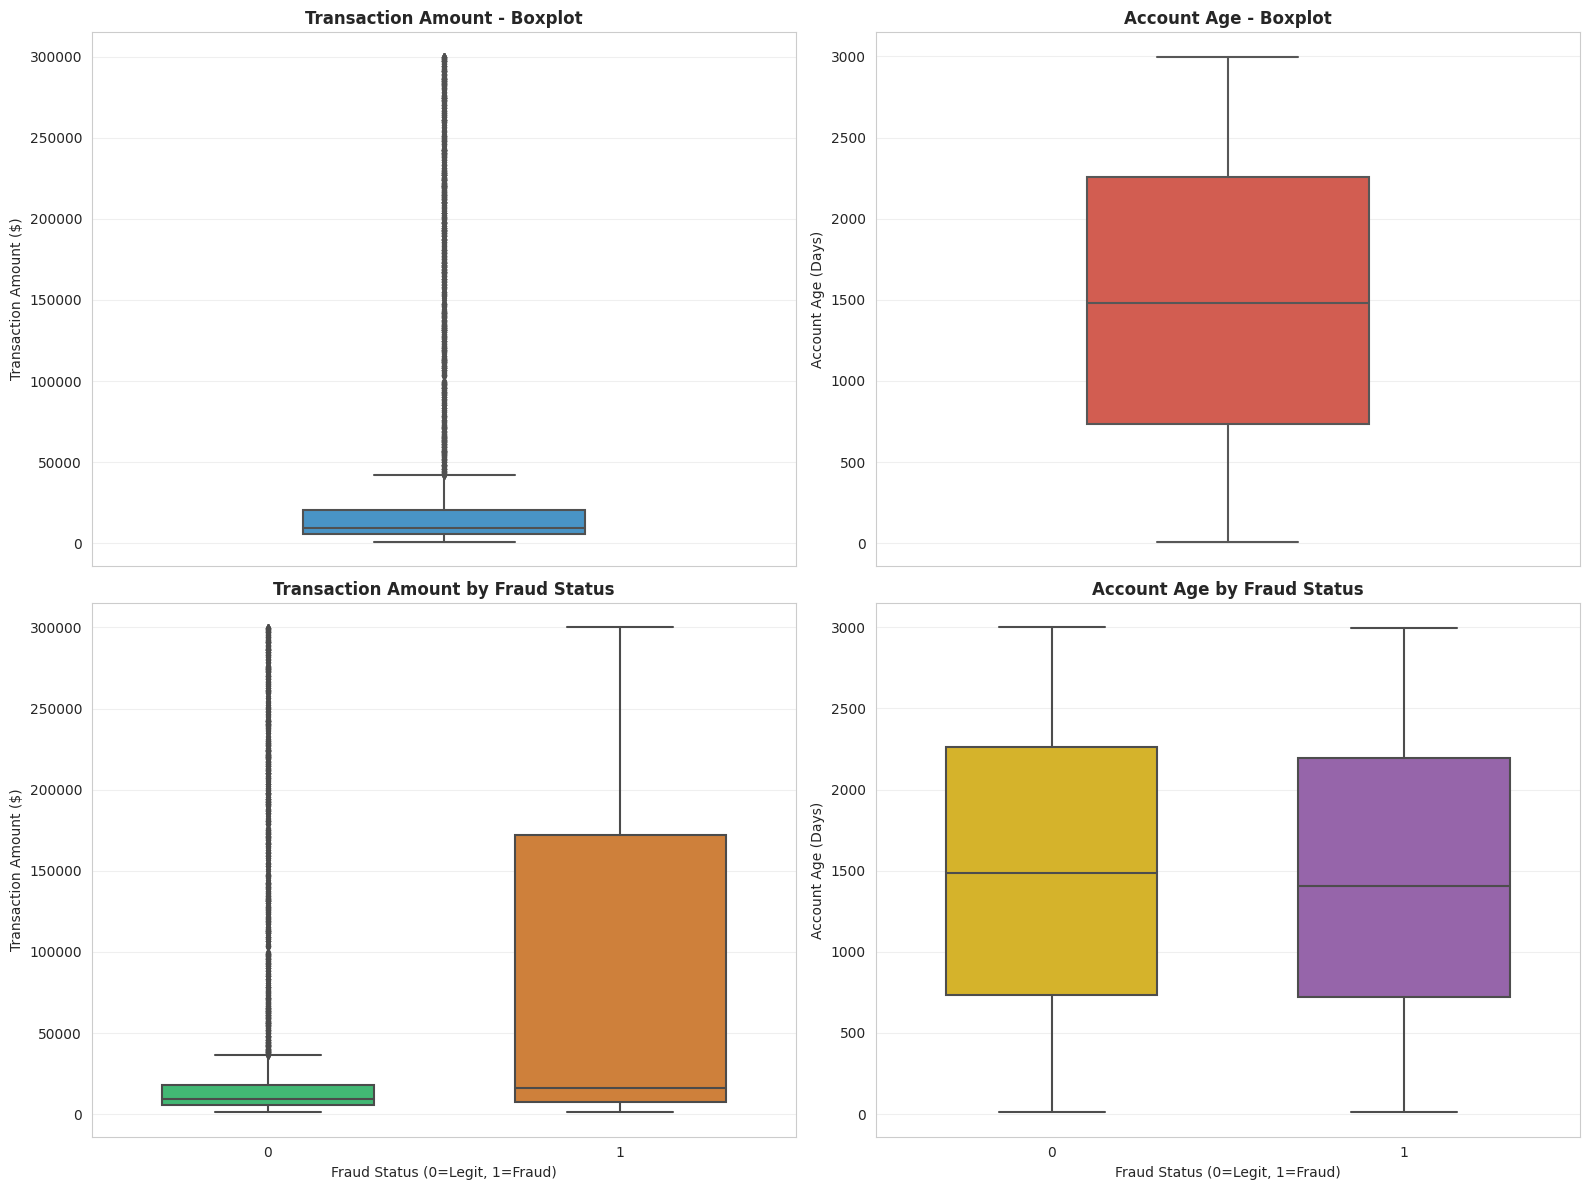

In [15]:
# ============================================
# 12. OUTLIER ANALYSIS
# ============================================
write_output("\n" + "="*80)
write_output("12. OUTLIER ANALYSIS")
write_output("="*80)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect and summarize outliers
for col in ['transaction_amount', 'account_age_days']:
    write_output(f"\n--- {col.upper()} OUTLIERS ---")
    outliers, lower, upper = detect_outliers_iqr(df, col)
    write_output(f"  Lower Bound: {lower:.2f}")
    write_output(f"  Upper Bound: {upper:.2f}")
    write_output(f"  Number of Outliers: {len(outliers):,} ({(len(outliers)/len(df))*100:.2f}%)")
    write_output(f"  Outliers in Fraud Cases: {outliers['is_fraud'].sum():,} "
                 f"({(outliers['is_fraud'].sum()/len(outliers))*100:.2f}% of outliers)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- Boxplot: Transaction Amount ---
sns.boxplot(
    y=df['transaction_amount'],
    ax=axes[0, 0],
    color='#3498db',
    width=0.4,
    fliersize=4,
    linewidth=1.5
)
axes[0, 0].set_title('Transaction Amount - Boxplot', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Transaction Amount ($)')
axes[0, 0].grid(axis='y', alpha=0.3)

# --- Boxplot: Account Age ---
sns.boxplot(
    y=df['account_age_days'],
    ax=axes[0, 1],
    color='#e74c3c',
    width=0.4,
    fliersize=4,
    linewidth=1.5
)
axes[0, 1].set_title('Account Age - Boxplot', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Account Age (Days)')
axes[0, 1].grid(axis='y', alpha=0.3)

# Split fraud vs legitimate
df_legitimate = df[df['is_fraud'] == 0]
df_fraud = df[df['is_fraud'] == 1]

# --- Boxplot: Transaction Amount by Fraud Status ---
sns.boxplot(
    data=df, x='is_fraud', y='transaction_amount',
    ax=axes[1, 0],
    palette={0: '#2ecc71', 1: '#e67e22'},
    width=0.6,
    fliersize=4,
    linewidth=1.5
)
axes[1, 0].set_title('Transaction Amount by Fraud Status', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Fraud Status (0=Legit, 1=Fraud)')
axes[1, 0].set_ylabel('Transaction Amount ($)')
axes[1, 0].grid(axis='y', alpha=0.3)

# --- Boxplot: Account Age by Fraud Status ---
sns.boxplot(
    data=df, x='is_fraud', y='account_age_days',
    ax=axes[1, 1],
    palette={0: '#f1c40f', 1: '#9b59b6'},
    width=0.6,
    fliersize=4,
    linewidth=1.5
)
axes[1, 1].set_title('Account Age by Fraud Status', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Fraud Status (0=Legit, 1=Fraud)')
axes[1, 1].set_ylabel('Account Age (Days)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('08_outlier_analysis.png', dpi=300, bbox_inches='tight')
write_output("\n📊 Saved: 08_outlier_analysis.png")
# plt.close()  # Keep plot open for display


# 13. COMPREHENSIVE SUMMARY & INSIGHTS

In [16]:
write_output("13. COMPREHENSIVE SUMMARY & KEY INSIGHTS")
write_output("\n📊 DATASET OVERVIEW:")
write_output(f"  • Total Transactions: {len(df):,}")
write_output(f"  • Total Features: {df.shape[1]}")
write_output(f"  • Date Range: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")
write_output(f"  • Duration: {(df['timestamp'].max() - df['timestamp'].min()).days} days")


write_output("\nFRAUD DETECTION METRICS:")
write_output(f"  • Fraudulent Transactions: {fraud_counts[1]:,} ({fraud_percentage[1]:.2f}%)")
write_output(f"  • Legitimate Transactions: {fraud_counts[0]:,} ({fraud_percentage[0]:.2f}%)")
write_output(f"  • Class Imbalance Ratio: 1:{fraud_counts[0]/fraud_counts[1]:.2f}")

write_output("\nTRANSACTION AMOUNT INSIGHTS:")
write_output(f"  • Average Amount: ${df['transaction_amount'].mean():,.2f}")
write_output(f"  • Median Amount: ${df['transaction_amount'].median():,.2f}")
write_output(f"  • Total Volume: ${df['transaction_amount'].sum():,.2f}")
write_output(f"  • Average Fraud Amount: ${df[df['is_fraud']==1]['transaction_amount'].mean():,.2f}")
write_output(f"  • Average Legitimate Amount: ${df[df['is_fraud']==0]['transaction_amount'].mean():,.2f}")

write_output("\nACCOUNT AGE INSIGHTS:")
write_output(f"  • Average Account Age: {df['account_age_days'].mean():.0f} days")
write_output(f"  • Median Account Age: {df['account_age_days'].median():.0f} days")
write_output(f"  • Average Age (Fraud): {df[df['is_fraud']==1]['account_age_days'].mean():.0f} days")
write_output(f"  • Average Age (Legitimate): {df[df['is_fraud']==0]['account_age_days'].mean():.0f} days")

write_output("\nCHANNEL INSIGHTS:")
for channel, rate in sorted(channel_fraud_rates.items(), key=lambda x: x[1], reverse=True):
    count = channel_data[channel]['count']
    write_output(f"  • {channel}: {int(count):,} transactions, {rate:.2f}% fraud rate")

write_output("\nKYC VERIFICATION INSIGHTS:")
for kyc, rate in sorted(kyc_fraud_rates.items(), key=lambda x: x[1], reverse=True):
    count = kyc_data[kyc]['count']
    write_output(f"  • {kyc}: {int(count):,} transactions, {rate:.2f}% fraud rate")

write_output("\nHIGH VALUE TRANSACTION INSIGHTS:")
write_output(f"  • High Value Transactions: {int(high_value_count):,} ({high_value_percentage:.2f}%)")
write_output(f"  • High Value Fraud Rate: {high_value_fraud_rate:.2f}%")
write_output(f"  • Regular Transaction Fraud Rate: {regular_fraud_rate:.2f}%")
write_output(f"  • Risk Difference: {high_value_fraud_rate - regular_fraud_rate:.2f} percentage points higher in high-value transactions")

write_output("\nTEMPORAL INSIGHTS:")
peak_hour = df.groupby('hour').size().idxmax()
peak_hour_count = df.groupby('hour').size().max()
write_output(f"  • Peak Transaction Hour: {peak_hour}:00 ({peak_hour_count:,} transactions)")
write_output(f"  • Most Fraud-Prone Hour: {hour_fraud_rate['rate'].idxmax()}:00 ({hour_fraud_rate['rate'].max():.2f}% fraud rate)")

peak_day = weekday_labels[df.groupby('weekday').size().idxmax()]
write_output(f"  • Busiest Day: {peak_day}")
write_output(f"  • Most Fraud-Prone Day: {weekday_labels[weekday_fraud_rate['rate'].idxmax()]} ({weekday_fraud_rate['rate'].max():.2f}% fraud rate)")

write_output("\nCORRELATION INSIGHTS:")
top_fraud_correlations = fraud_correlations.drop('is_fraud').abs().sort_values(ascending=False).head(3)
write_output("  • Top 3 Features Correlated with Fraud:")
for i, (feature, corr) in enumerate(top_fraud_correlations.items(), 1):
    direction = "positively" if fraud_correlations[feature] > 0 else "negatively"
    write_output(f"    {i}. {feature}: {fraud_correlations[feature]:.4f} ({direction} correlated)")

write_output("\nKEY RISK FACTORS:")
risk_factors = []

# Safe key retrieval for KYC categories
kyc_no_rate = kyc_fraud_rates.get('No', kyc_fraud_rates.get('N', kyc_fraud_rates.get('Unverified', kyc_fraud_rates.get(False, 0))))
kyc_yes_rate = kyc_fraud_rates.get('Yes', kyc_fraud_rates.get('Y', kyc_fraud_rates.get('Verified', kyc_fraud_rates.get(True, 0))))

if kyc_no_rate and kyc_yes_rate and kyc_no_rate > kyc_yes_rate:
    risk_factors.append(f"Non-KYC verified accounts ({kyc_no_rate:.2f}% vs {kyc_yes_rate:.2f}% fraud rate)")

# High-value transaction risk
if high_value_fraud_rate > regular_fraud_rate:
    risk_factors.append(f"High-value transactions ({high_value_fraud_rate:.2f}% vs {regular_fraud_rate:.2f}% fraud rate)")

# Highest risk channel
highest_risk_channel = max(channel_fraud_rates, key=channel_fraud_rates.get)
risk_factors.append(f"{highest_risk_channel} channel ({channel_fraud_rates[highest_risk_channel]:.2f}% fraud rate)")

# Output risk factors
for i, factor in enumerate(risk_factors, 1):
    write_output(f"  {i}. {factor}")



13. COMPREHENSIVE SUMMARY & KEY INSIGHTS

📊 DATASET OVERVIEW:
  • Total Transactions: 5,000
  • Total Features: 19
  • Date Range: 2025-08-01 to 2025-08-25
  • Duration: 24 days

FRAUD DETECTION METRICS:
  • Fraudulent Transactions: 187 (8.64%)
  • Legitimate Transactions: 245 (91.36%)
  • Class Imbalance Ratio: 1:1.31

TRANSACTION AMOUNT INSIGHTS:
  • Average Amount: $39,283.32
  • Median Amount: $9,670.00
  • Total Volume: $196,416,605.00
  • Average Fraud Amount: $87,011.64
  • Average Legitimate Amount: $34,769.61

ACCOUNT AGE INSIGHTS:
  • Average Account Age: 1499 days
  • Median Account Age: 1482 days
  • Average Age (Fraud): 1444 days
  • Average Age (Legitimate): 1504 days

CHANNEL INSIGHTS:
  • MOBILE: 1,992 transactions, 9.59% fraud rate
  • WEB: 1,734 transactions, 8.71% fraud rate
  • POS: 784 transactions, 7.40% fraud rate
  • ATM: 490 transactions, 6.53% fraud rate

KYC VERIFICATION INSIGHTS:
  • NO: 790 transactions, 21.52% fraud rate
  • YES: 4,210 transactions, 6.22% 